In [ ]:
pip install pyaudio

In [ ]:
pip install SpeechRecognition

In [ ]:
pip install gTTS sounddevice scipy


In [ ]:
pip install opencv-python

In [11]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Nikhil Prajapati\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import time
import cv2
import numpy as np
import PIL.Image
import google.generativeai as genai
from gtts import gTTS
import sounddevice as sd
from scipy.io.wavfile import write
import io
import os


In [3]:
# Configure the API
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
model = genai.GenerativeModel('gemini-1.5-flash-8b')


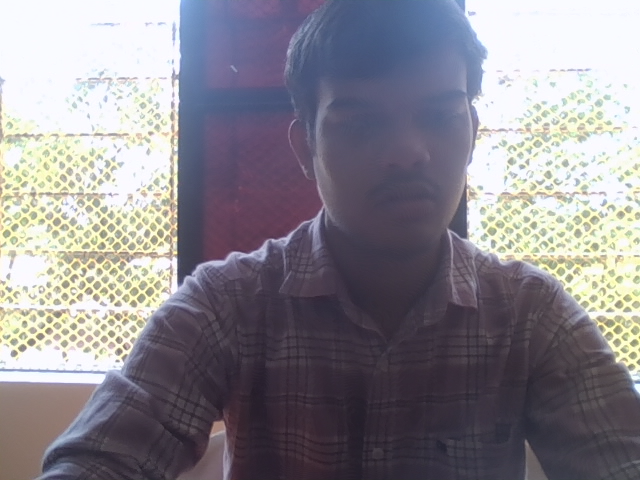

In [ ]:
import io
import cv2
import IPython.display as display
from PIL import Image
from gtts import gTTS
from IPython.display import Audio, clear_output

def generate_description_for_frame(frame, prompt="Explain this image within 30 words"):
    """Generate a description for a single image frame using the gemini-1.5-flash model."""
    pil_image = Image.fromarray(frame)
    response = model.generate_content([prompt, pil_image])  # Assuming `model` is already defined
    return response.text

def save_description_as_audio(description, filename="description_audio.mp3"):
    """Convert description text to speech and save it as an audio file."""
    tts = gTTS(text=description, lang='en')
    tts.save(filename)
    print(f"Audio saved as {filename}")
    return filename

# Access the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not access the webcam.")

description = ""  # To store and display the latest description

try:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break
        
        # Convert to RGB for display in Jupyter
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame in the notebook
        clear_output(wait=True)
        display.display(Image.fromarray(rgb_frame))
        
        # Ask for input in Jupyter
        question = input("Ask a question (or type 'exit' to quit, or press Enter to skip): ")
        
        if question.lower() == 'exit':
            break
        elif question:
            # Generate description
            description = generate_description_for_frame(rgb_frame, prompt=question)
            print("Answer:", description)
            
            # Save description as audio and display in notebook
            # audio_filename = save_description_as_audio(description)
            # display.display(Audio(audio_filename, autoplay=True))
        
except KeyboardInterrupt:
    # Exit the loop on interrupt
    pass
finally:
    # Release resources
    cap.release()
